# TCC Bruno Cunha Zago - Ciência de Dados e Big Data - PUC Minas

## Análise da relação entre obra de manutenção rodoviária e redução de acidentes no tráfego

# Importando bibliotecas

In [1]:
#Carregamento de bibliotecas gerais
import requests
import zipfile
import io
import pandas as pd
import xlrd
import calendar
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from dateutil import rrule, parser
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix
from sklearn.linear_model import SGDClassifier, LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeRegressor

# Desativar FutureWarnings
warnings.filterwarnings('ignore')

# 1 - Definição do Problema

Rodovias são o principal meio de transporte de carga no brasil. Com isso, há muitos acidentes. 

# 2 - Coleta de Dados

Neste Trabalho foram utilizadas três fontes de dados, todas baseadas no período de observação entre os dias 01 de maio de 2022 e 30 de junho de 2022, são elas:

Os dados da contagem volumétrica de radares radares da cidade de Belo Horizonte no período de observação;
Base gerada com informações do tipo de dia (dia útil, sábado, domingo e feriado) para o mesmo período;
Base gerada a partir de uma API de dados climáticos com o histórico do clima de todos os dias do período em questão.
Os meses de maio e junho de 2022 foram escolhidos pois foram os meses do ano de 2022 que apresentaram maior homogeneidade e tamanhos de arquivos próximos.

# 2.1 - Base de Acidentes (tabela datatran)

# Baixando e extraindo
extract_path = r"C:\Users\bcz87" #caminho de extração
urls = [
    "https://drive.google.com/u/0/uc?id=1PRQjuV5gOn_nn6UNvaJyVURDIfbSAK4-&export=download",
    "https://drive.google.com/u/0/uc?id=12xH8LX9aN2gObR766YN3cMcuycwyCJDz&export=download",
    "https://drive.google.com/u/0/uc?id=1esu6IiH5TVTxFoedv6DBGDd01Gvi8785&export=download",
    "https://drive.google.com/u/0/uc?id=1pN3fn2wY34GH6cY-gKfbxRJJBFE0lb_l&export=download",
    "https://drive.google.com/u/0/uc?id=1cM4IgGMIiR-u4gBIH5IEe3DcvBvUzedi&export=download",
    "https://drive.google.com/u/0/uc?id=1HPLWt5f_l4RIX3tKjI4tUXyZOev52W0N&export=download",
    "https://drive.google.com/u/0/uc?id=16qooQl_ySoW61CrtsBbreBVNPYlEkoYm&export=download",
    "https://drive.google.com/u/0/uc?id=1DyqR5FFcwGsamSag-fGm13feQt0Y-3Da&export=download",
    "https://drive.google.com/u/0/uc?id=1FpF5wTBsRDkEhLm3z2g8XDiXr9SO9Uk8&export=download",
    "https://drive.google.com/u/0/uc?id=1p_7lw9RzkINfscYAZSmc-Z9Ci4ZPJyEr&export=download",
    "https://drive.google.com/u/0/uc?id=18Yz2prqKSLthrMmW-73vrOiDmKTCL6xE&export=download",
    "https://drive.google.com/u/0/uc?id=1HHhgLF-kSR6Gde2qOaTXL3T5ieD33hpG&export=download",
    "https://drive.google.com/u/0/uc?id=1_yU6FRh8M7USjiChQwyF20NtY48GTmEX&export=download",
    "https://drive.google.com/u/0/uc?id=1qkVatg0pC_zosuBs0NCSgEXDJvBbnTYC&export=download",
    "https://drive.google.com/u/0/uc?id=1_OSeHlyKJw8cIhMS_JzSg1RlYX8k6vSG&export=download",
    "https://drive.google.com/u/0/uc?id=1EFpZF5F6cB0DOHd2Uxnj7X948WE69a8e&export=download"
]
file_names = [
    "datatran2022.zip",
    "datatran2021.zip",
    "datatran2020.zip",
    "datatran2019.zip",
    "datatran2018.zip",
    "datatran2017.zip",
    "datatran2016.zip",
    "datatran2015.zip",
    "datatran2014.zip",
    "datatran2013.zip",
    "datatran2012.zip",
    "datatran2011.zip",
    "datatran2010.zip",
    "datatran2009.zip",
    "datatran2008.zip",
    "datatran2007.zip"
]

for url, file_name in zip(urls, file_names):
    response = requests.get(url)
    open(file_name, "wb").write(response.content)
    
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

In [2]:
# Carregando arquivo
# Lista com o nome dos arquivos
file_names = ['datatran2022.csv', 'datatran2021.csv', 'datatran2020.csv', 'datatran2019.csv',
              'datatran2018.csv', 'datatran2017.csv', 'datatran2016.csv', 'datatran2015.csv',
              'datatran2014.csv', 'datatran2013.csv', 'datatran2012.csv', 'datatran2011.csv',
              'datatran2010.csv', 'datatran2009.csv', 'datatran2008.csv', 'datatran2007.csv']

# Caminho dos arquivos
path = r"C:\\Users\\bcz87\\"

# Lista para armazenar os dataframes
dfs = []

# Loop para ler cada arquivo e armazená-lo na lista dfs
for file in file_names:
    df = pd.read_csv(path + file, sep=';', decimal=',', encoding = 'cp1252', low_memory=False)
    dfs.append(df)

# Concatenação dos dataframes na mesma tabela
datatran = pd.concat(dfs, ignore_index=True)

print(datatran.head())

         id data_inversa dia_semana   horario  uf     br     km  \
0  405151.0   2022-01-01     sábado  01:35:00  PI  316.0  415.0   
1  405158.0   2022-01-01     sábado  02:40:00  PR  116.0   33.0   
2  405172.0   2022-01-01     sábado  05:22:00  MS  163.0  393.0   
3  405203.0   2022-01-01     sábado  07:00:00  RJ  101.0  457.0   
4  405207.0   2022-01-01     sábado  09:00:00  MG   40.0  508.3   

               municipio                                     causa_acidente  \
0            MARCOLANDIA                   Ingestão de álcool pelo condutor   
1  CAMPINA GRANDE DO SUL                   Ingestão de álcool pelo condutor   
2   NOVA ALVORADA DO SUL  Condutor deixou de manter distância do veículo...   
3         ANGRA DOS REIS           Reação tardia ou ineficiente do condutor   
4     RIBEIRAO DAS NEVES                  Acumulo de água sobre o pavimento   

               tipo_acidente  ... ilesos ignorados feridos veiculos  \
0           Colisão traseira  ...      1         0 

In [3]:
datatran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981217 entries, 0 to 1981216
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      float64
 1   data_inversa            object 
 2   dia_semana              object 
 3   horario                 object 
 4   uf                      object 
 5   br                      object 
 6   km                      object 
 7   municipio               object 
 8   causa_acidente          object 
 9   tipo_acidente           object 
 10  classificacao_acidente  object 
 11  fase_dia                object 
 12  sentido_via             object 
 13  condicao_metereologica  object 
 14  tipo_pista              object 
 15  tracado_via             object 
 16  uso_solo                object 
 17  pessoas                 int64  
 18  mortos                  int64  
 19  feridos_leves           int64  
 20  feridos_graves          int64  
 21  ilesos                  int64  

In [4]:
# Convertendo a coluna br para números decimais
datatran['br'] = pd.to_numeric(datatran['br'], errors='coerce')

# Retirando linhas que contêm valores NaN da coluna br
datatran = datatran.dropna(subset=['br'])

# Convertendo a coluna br para números inteiros
datatran['br'] = datatran['br'].astype(int)

# Convertendo a coluna km para números decimais
datatran['km'] = pd.to_numeric(datatran['km'], errors='coerce')

# Retirando linhas que contêm valores NaN da coluna km
datatran = datatran.dropna(subset=['km'])

# converter a coluna 'data_inversa' para o tipo datetime
datatran['data_inversa'] = pd.to_datetime(datatran['data_inversa'])

In [5]:
datatran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980323 entries, 0 to 1981216
Data columns (total 31 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   id                      float64       
 1   data_inversa            datetime64[ns]
 2   dia_semana              object        
 3   horario                 object        
 4   uf                      object        
 5   br                      int32         
 6   km                      float64       
 7   municipio               object        
 8   causa_acidente          object        
 9   tipo_acidente           object        
 10  classificacao_acidente  object        
 11  fase_dia                object        
 12  sentido_via             object        
 13  condicao_metereologica  object        
 14  tipo_pista              object        
 15  tracado_via             object        
 16  uso_solo                object        
 17  pessoas                 int64         
 18  mo

In [6]:
datatran = datatran[datatran['causa_acidente'] == 'Defeito na Via']

print(datatran.head())

              id data_inversa     dia_semana   horario  uf   br     km  \
129133  261177.0   2020-01-06  segunda-feira  08:20:00  GO  153  369.1   
129276  261915.0   2020-01-10    sexta-feira  10:50:00  PA  155  270.0   
129300  262021.0   2020-01-11         sábado  00:30:00  SE  101  148.7   
129326  262143.0   2020-01-11         sábado  13:00:00  MA  226  567.6   
129596  263391.0   2020-01-17    sexta-feira  07:10:00  GO  153  366.1   

                  municipio  causa_acidente              tipo_acidente  ...  \
129133              JARAGUA  Defeito na Via            Colisão frontal  ...   
129276  ELDORADO DO CARAJAS  Defeito na Via           Colisão traseira  ...   
129300             ESTANCIA  Defeito na Via                 Tombamento  ...   
129326         PORTO FRANCO  Defeito na Via            Colisão lateral  ...   
129596              JARAGUA  Defeito na Via  Saída de leito carroçável  ...   

       ilesos ignorados feridos veiculos      latitude     longitude regional  \

In [7]:
# Definindo períodos mensais
datatran['mes_ano'] = datatran['data_inversa'].dt.strftime('%m/%Y')

print(datatran.head())

              id data_inversa     dia_semana   horario  uf   br     km  \
129133  261177.0   2020-01-06  segunda-feira  08:20:00  GO  153  369.1   
129276  261915.0   2020-01-10    sexta-feira  10:50:00  PA  155  270.0   
129300  262021.0   2020-01-11         sábado  00:30:00  SE  101  148.7   
129326  262143.0   2020-01-11         sábado  13:00:00  MA  226  567.6   
129596  263391.0   2020-01-17    sexta-feira  07:10:00  GO  153  366.1   

                  municipio  causa_acidente              tipo_acidente  ...  \
129133              JARAGUA  Defeito na Via            Colisão frontal  ...   
129276  ELDORADO DO CARAJAS  Defeito na Via           Colisão traseira  ...   
129300             ESTANCIA  Defeito na Via                 Tombamento  ...   
129326         PORTO FRANCO  Defeito na Via            Colisão lateral  ...   
129596              JARAGUA  Defeito na Via  Saída de leito carroçável  ...   

       ignorados feridos veiculos      latitude     longitude regional  \
129133

# Salvando o arquivo concatenado em .csv
datatran.to_csv(r"C:\Users\bcz87\datatran.csv", index=False, sep=';', decimal=',', encoding = 'cp1252')

## 2.2 - Base do SNV (tabela snv)

url = "https://servicos.dnit.gov.br/dnitcloud/index.php/s/TYqwT6cQ2b7Tq5Q/download"
file_name = "pub_202301B.zip"

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [8]:
arquivo = "C:\\Users\\bcz87\\pub_202301B\\SNV_202301B.xls"
snv = pd.read_excel(arquivo, skiprows=[0, 1])

print(snv.head())

   BR UF   Tipo de trecho Desc Coinc      Código  \
0  10  DF  Eixo Principal          -  010BDF0010   
1  10  DF  Eixo Principal          -  010BDF0015   
2  10  DF  Eixo Principal          -  010BDF0016   
3  10  DF  Eixo Principal          -  010BDF0018   
4  10  DF  Eixo Principal          -  010BDF0020   

                               Local de Início          Local de Fim  \
0  ENTR BR-020(A)/030(A)/450/DF-001 (BRASÍLIA)           ENTR DF-440   
1                                  ENTR DF-440   ACESSO I SOBRADINHO   
2                          ACESSO I SOBRADINHO  ACESSO II SOBRADINHO   
3                         ACESSO II SOBRADINHO           ENTR DF-230   
4                                  ENTR DF-230           ENTR DF-128   

   km inicial  km final  Extensão Superfície Federal Obras  \
0         0.0       2.4       2.4                DUP   NaN   
1         2.4       6.0       3.6                DUP   NaN   
2         6.0       8.3       2.3                DUP   NaN   
3     

In [9]:
print(snv.dtypes)

BR                               int64
UF                              object
Tipo de trecho                  object
Desc Coinc                      object
Código                          object
Local de Início                 object
Local de Fim                    object
km inicial                     float64
km final                       float64
Extensão                       float64
Superfície Federal              object
Obras                           object
Federal Coincidente             object
Administração                   object
Ato legal                      float64
Estadual Coincidente            object
Superfície Est. Coincidente     object
Jurisdição                      object
Superfície                      object
Unidade Local                   object
dtype: object


In [10]:
snv = snv.rename(columns={"BR": "br", "UF ": "uf", "km inicial": "km_inicial", "km final": "km_final", "Código": "codigo", "Extensão": "extensao"})

In [11]:
print(snv['Tipo de trecho'].unique())

['Eixo Principal' 'Acesso' 'Contorno' 'Travessia Urbana' 'Variante' 'Anel']


In [12]:
snv = snv[snv["Tipo de trecho"] == "Eixo Principal"]

# Salvar o resultado em um novo arquivo CSV
snv.to_csv('snv.csv', index=False, sep=';', decimal=',', encoding = 'cp1252')

## 2.3 - Base de Obra (tabela obra)

In [13]:
# Baixando e extraindo
file_path = r'C:\Users\bcz87\contrato.csv'
obra = pd.read_csv(file_path, sep=';', decimal=',')

print(obra.head())

   obra  uf  data_inicio  data_fim   br  km_inicial  km_final
0  G002  MG        42186     43719  267        62.0      98.7
1  G003  MG        42359     44260  458        97.2     147.2
2  G004  MG        42359     44183   50        65.5      77.0
3  G005  MG        42403     44221  262         0.0      72.2
4  G006  MG        42403     42909  452        58.4      91.8


In [14]:
print(obra.dtypes)

obra            object
uf              object
data_inicio      int64
data_fim         int64
br               int64
km_inicial     float64
km_final       float64
dtype: object


In [15]:
# converter as colunas 'data_inicio' e 'data_fim' para o formato de data do Python
obra['data_inicio'] = obra['data_inicio'].apply(lambda x: xlrd.xldate_as_datetime(x, 0))
obra['data_fim'] = obra['data_fim'].apply(lambda x: xlrd.xldate_as_datetime(x, 0))

In [16]:
print(obra.dtypes)

obra                   object
uf                     object
data_inicio    datetime64[ns]
data_fim       datetime64[ns]
br                      int64
km_inicial            float64
km_final              float64
dtype: object


In [17]:
obra['extensao'] = obra['km_final'] - obra['km_inicial']

print(obra.head())

   obra  uf data_inicio   data_fim   br  km_inicial  km_final  extensao
0  G002  MG  2015-07-01 2019-09-11  267        62.0      98.7      36.7
1  G003  MG  2015-12-21 2021-03-05  458        97.2     147.2      50.0
2  G004  MG  2015-12-21 2020-12-18   50        65.5      77.0      11.5
3  G005  MG  2016-02-03 2021-01-25  262         0.0      72.2      72.2
4  G006  MG  2016-02-03 2017-06-23  452        58.4      91.8      33.4


# Salvar o resultado em um novo arquivo CSV
obra.to_csv('obra.csv', index=False, sep=';', decimal=',', encoding = 'cp1252')

## 3 - Processamento/Tratamento de Dados

## 3.1 - Unindo as tabelas (tabela datatran_snv_obra)

## 3.1.1 - Incluir coluna index em datatran

In [18]:
datatran_snv_obra = datatran.copy()

# criar coluna index
datatran_snv_obra = datatran_snv_obra.reset_index()

# Exibir as primeiras linhas da tabela datatran com a coluna "obra" adicionada
print(datatran_snv_obra.head())

    index        id data_inversa     dia_semana   horario  uf   br     km  \
0  129133  261177.0   2020-01-06  segunda-feira  08:20:00  GO  153  369.1   
1  129276  261915.0   2020-01-10    sexta-feira  10:50:00  PA  155  270.0   
2  129300  262021.0   2020-01-11         sábado  00:30:00  SE  101  148.7   
3  129326  262143.0   2020-01-11         sábado  13:00:00  MA  226  567.6   
4  129596  263391.0   2020-01-17    sexta-feira  07:10:00  GO  153  366.1   

             municipio  causa_acidente  ... ignorados feridos veiculos  \
0              JARAGUA  Defeito na Via  ...         0       4        5   
1  ELDORADO DO CARAJAS  Defeito na Via  ...         0       0        2   
2             ESTANCIA  Defeito na Via  ...         0       1        1   
3         PORTO FRANCO  Defeito na Via  ...         0       0        2   
4              JARAGUA  Defeito na Via  ...         0       1        1   

       latitude     longitude regional delegacia             uop  ano  mes_ano  
0  -15.8309

## 3.1.2 - Incluir coluna codigo em datatran

In [19]:
# Merge das tabelas datatran e obra
merged = pd.merge(datatran_snv_obra, snv, on=['uf', 'br'])
merged = merged[(merged['km'] >= merged['km_inicial']) & (merged['km'] < merged['km_final'])]

# Selecionar apenas as colunas "index" e "obra" da tabela merged
merged = merged[["index", "codigo"]]

# Mesclar as tabelas usando a coluna de índice como chave de junção
datatran_snv_obra = pd.merge(datatran_snv_obra, merged, on="index", how="left")

# Exibir as primeiras linhas da tabela datatran com a coluna "obra" adicionada
print(datatran_snv_obra.head())

    index        id data_inversa     dia_semana   horario  uf   br     km  \
0  129133  261177.0   2020-01-06  segunda-feira  08:20:00  GO  153  369.1   
1  129276  261915.0   2020-01-10    sexta-feira  10:50:00  PA  155  270.0   
2  129300  262021.0   2020-01-11         sábado  00:30:00  SE  101  148.7   
3  129326  262143.0   2020-01-11         sábado  13:00:00  MA  226  567.6   
4  129596  263391.0   2020-01-17    sexta-feira  07:10:00  GO  153  366.1   

             municipio  causa_acidente  ... feridos veiculos      latitude  \
0              JARAGUA  Defeito na Via  ...       4        5  -15.83090246   
1  ELDORADO DO CARAJAS  Defeito na Via  ...       0        2   -6.09701984   
2             ESTANCIA  Defeito na Via  ...       1        1  -11.23753745   
3         PORTO FRANCO  Defeito na Via  ...       0        2   -6.32865709   
4              JARAGUA  Defeito na Via  ...       1        1    -15.799685   

      longitude regional delegacia             uop ano  mes_ano     

## 3.1.3 - Incluir coluna obra em datatran

In [20]:
# Merge das tabelas datatran e obra
merged = pd.merge(datatran_snv_obra, obra, on=['uf', 'br'])
merged = merged[(merged['data_inversa'] >= merged['data_inicio']) & (merged['data_inversa'] <= merged['data_fim']) & (merged['km'] >= merged['km_inicial']) & (merged['km'] <= merged['km_final'])]

# Selecionar apenas as colunas "index" e "obra" da tabela merged
merged = merged[["index", "obra"]]

# Mesclar as tabelas usando a coluna de índice como chave de junção
datatran_snv_obra = pd.merge(datatran_snv_obra, merged, on="index", how="left")

# Exibir as primeiras linhas da tabela datatran com a coluna "obra" adicionada
print(datatran_snv_obra.head())

    index        id data_inversa     dia_semana   horario  uf   br     km  \
0  129133  261177.0   2020-01-06  segunda-feira  08:20:00  GO  153  369.1   
1  129276  261915.0   2020-01-10    sexta-feira  10:50:00  PA  155  270.0   
2  129300  262021.0   2020-01-11         sábado  00:30:00  SE  101  148.7   
3  129326  262143.0   2020-01-11         sábado  13:00:00  MA  226  567.6   
4  129596  263391.0   2020-01-17    sexta-feira  07:10:00  GO  153  366.1   

             municipio  causa_acidente  ... veiculos      latitude  \
0              JARAGUA  Defeito na Via  ...        5  -15.83090246   
1  ELDORADO DO CARAJAS  Defeito na Via  ...        2   -6.09701984   
2             ESTANCIA  Defeito na Via  ...        1  -11.23753745   
3         PORTO FRANCO  Defeito na Via  ...        2   -6.32865709   
4              JARAGUA  Defeito na Via  ...        1    -15.799685   

      longitude regional delegacia             uop ano  mes_ano      codigo  \
0   -49.2791748  SPRF-GO  DEL02-GO  U

# Salvar o resultado em um novo arquivo CSV
datatran_snv_obra.to_csv('datatran_snv_obra.csv', index=False, sep=';', decimal=',', encoding = 'cp1252')

## 3.2 - Criação de tabelas

## 3.2.1 - Tabela de Acidentes por SNV (acidente_snv)

In [21]:
# Lista de códigos únicos da coluna "código" da tabela snv
codigos_unicos = snv['codigo'].unique()

# Lista de todas as datas no intervalo de janeiro de 2007 até dezembro de 2022
datas = pd.date_range(start='01/01/2007', end='12/31/2022', freq='M').strftime('%m/%Y').tolist()

# Cria uma nova tabela com as colunas "Código" e "mes_ano"
acidente_snv = pd.DataFrame({'codigo': np.repeat(codigos_unicos, len(datas)),
                             'mes_ano': np.tile(datas, len(codigos_unicos))})

# Reset o índice da tabela resultante
acidente_snv = acidente_snv.reset_index(drop=True)

print(acidente_snv.head())

       codigo  mes_ano
0  010BDF0010  01/2007
1  010BDF0010  02/2007
2  010BDF0010  03/2007
3  010BDF0010  04/2007
4  010BDF0010  05/2007


In [22]:
acidente_snv = pd.merge(acidente_snv, snv, on='codigo', how='left')

print(acidente_snv.head())

       codigo  mes_ano  br  uf  Tipo de trecho Desc Coinc  \
0  010BDF0010  01/2007  10  DF  Eixo Principal          -   
1  010BDF0010  02/2007  10  DF  Eixo Principal          -   
2  010BDF0010  03/2007  10  DF  Eixo Principal          -   
3  010BDF0010  04/2007  10  DF  Eixo Principal          -   
4  010BDF0010  05/2007  10  DF  Eixo Principal          -   

                               Local de Início Local de Fim  km_inicial  \
0  ENTR BR-020(A)/030(A)/450/DF-001 (BRASÍLIA)  ENTR DF-440         0.0   
1  ENTR BR-020(A)/030(A)/450/DF-001 (BRASÍLIA)  ENTR DF-440         0.0   
2  ENTR BR-020(A)/030(A)/450/DF-001 (BRASÍLIA)  ENTR DF-440         0.0   
3  ENTR BR-020(A)/030(A)/450/DF-001 (BRASÍLIA)  ENTR DF-440         0.0   
4  ENTR BR-020(A)/030(A)/450/DF-001 (BRASÍLIA)  ENTR DF-440         0.0   

   km_final  ...  Superfície Federal Obras               Federal Coincidente  \
0       2.4  ...                 DUP   NaN  010BDF0010;020BDF0010;030BDF0010   
1       2.4  ...      

In [23]:
acidente_snv = acidente_snv.drop(["Tipo de trecho", "Desc Coinc", "Local de Início", "Local de Fim", "Superfície Federal", "Obras", "Federal Coincidente", "Administração", "Ato legal", "Estadual Coincidente", "Superfície Est. Coincidente", "Jurisdição", "Superfície", "Unidade Local"], axis=1)

print(acidente_snv.head())

       codigo  mes_ano  br  uf  km_inicial  km_final  extensao
0  010BDF0010  01/2007  10  DF         0.0       2.4       2.4
1  010BDF0010  02/2007  10  DF         0.0       2.4       2.4
2  010BDF0010  03/2007  10  DF         0.0       2.4       2.4
3  010BDF0010  04/2007  10  DF         0.0       2.4       2.4
4  010BDF0010  05/2007  10  DF         0.0       2.4       2.4


In [24]:
# Etapa 1 - Groupby na tabela datatran_snv_obra pelas colunas codigo e mes_ano
datatran_grouped = datatran_snv_obra.groupby(['codigo', 'mes_ano']).count().reset_index()[['codigo', 'mes_ano', 'index']]
datatran_grouped.rename(columns={'index': 'num_acidente'}, inplace=True)

# Etapa 2 - Merge entre datatran_grouped e acidente_snv pelas colunas codigo e mes_ano
acidente_snv = pd.merge(acidente_snv, datatran_grouped, on=['codigo', 'mes_ano'], how='left')

print(acidente_snv.head())
print("\n")
print(acidente_snv.info())

# Calcular a proporção de valores nulos na coluna "num_acidente"
print("\nProporção de valores nulos na coluna 'num_acidente':")
print(acidente_snv['num_acidente'].isnull().mean())

       codigo  mes_ano  br  uf  km_inicial  km_final  extensao  num_acidente
0  010BDF0010  01/2007  10  DF         0.0       2.4       2.4           NaN
1  010BDF0010  02/2007  10  DF         0.0       2.4       2.4           NaN
2  010BDF0010  03/2007  10  DF         0.0       2.4       2.4           NaN
3  010BDF0010  04/2007  10  DF         0.0       2.4       2.4           NaN
4  010BDF0010  05/2007  10  DF         0.0       2.4       2.4           NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341504 entries, 0 to 1341503
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   codigo        1341504 non-null  object 
 1   mes_ano       1341504 non-null  object 
 2   br            1341504 non-null  int64  
 3   uf            1341504 non-null  object 
 4   km_inicial    1341504 non-null  float64
 5   km_final      1341504 non-null  float64
 6   extensao      1341504 non-null  float64
 7   num_acidente  

acidente_snv['num_acidente'].fillna(0, inplace=True)

print(acidente_snv.head())

In [25]:
acidente_snv = acidente_snv.dropna(subset=["num_acidente"])

print(acidente_snv.head())

          codigo  mes_ano  br  uf  km_inicial  km_final  extensao  \
4766  010BMA0370  03/2020  10  MA        34.0     128.8      94.8   
4772  010BMA0370  09/2020  10  MA        34.0     128.8      94.8   
4920  010BMA0390  01/2017  10  MA       128.8     156.4      27.6   
4921  010BMA0390  02/2017  10  MA       128.8     156.4      27.6   
4922  010BMA0390  03/2017  10  MA       128.8     156.4      27.6   

      num_acidente  
4766           1.0  
4772           1.0  
4920           1.0  
4921           2.0  
4922           3.0  


In [26]:
acidente_snv['mes_ano'] = pd.to_datetime(acidente_snv['mes_ano'], format='%m/%Y')
acidente_snv['mes'] = acidente_snv['mes_ano'].dt.month
acidente_snv['ano'] = acidente_snv['mes_ano'].dt.year

print(acidente_snv.head())

          codigo    mes_ano  br  uf  km_inicial  km_final  extensao  \
4766  010BMA0370 2020-03-01  10  MA        34.0     128.8      94.8   
4772  010BMA0370 2020-09-01  10  MA        34.0     128.8      94.8   
4920  010BMA0390 2017-01-01  10  MA       128.8     156.4      27.6   
4921  010BMA0390 2017-02-01  10  MA       128.8     156.4      27.6   
4922  010BMA0390 2017-03-01  10  MA       128.8     156.4      27.6   

      num_acidente  mes   ano  
4766           1.0    3  2020  
4772           1.0    9  2020  
4920           1.0    1  2017  
4921           2.0    2  2017  
4922           3.0    3  2017  


# Salvar o resultado em um novo arquivo CSV
acidente_snv.to_csv('acidente_snv.csv', index=False, sep=';', decimal=',', encoding = 'cp1252')

## 3.2.2 - Tabela de Acidentes por Obra (acidente_obra)

In [27]:
# Baixando e extraindo
file_path = r'C:\Users\bcz87\obra_mes_ano.csv'
acidente_obra = pd.read_csv(file_path, sep=';', decimal=',')

print(acidente_obra.head())

   obra  mes_ano
0  G002  07/2015
1  G002  08/2015
2  G002  09/2015
3  G002  10/2015
4  G002  11/2015


In [28]:
print(acidente_obra.dtypes)

obra       object
mes_ano    object
dtype: object


In [29]:
acidente_obra = pd.merge(acidente_obra, obra, on='obra', how='left')

print(acidente_obra.head())

   obra  mes_ano  uf data_inicio   data_fim   br  km_inicial  km_final  \
0  G002  07/2015  MG  2015-07-01 2019-09-11  267        62.0      98.7   
1  G002  08/2015  MG  2015-07-01 2019-09-11  267        62.0      98.7   
2  G002  09/2015  MG  2015-07-01 2019-09-11  267        62.0      98.7   
3  G002  10/2015  MG  2015-07-01 2019-09-11  267        62.0      98.7   
4  G002  11/2015  MG  2015-07-01 2019-09-11  267        62.0      98.7   

   extensao  
0      36.7  
1      36.7  
2      36.7  
3      36.7  
4      36.7  


In [30]:
acidente_obra = acidente_obra.drop(["data_inicio", "data_fim"], axis=1)

print(acidente_obra.head())

   obra  mes_ano  uf   br  km_inicial  km_final  extensao
0  G002  07/2015  MG  267        62.0      98.7      36.7
1  G002  08/2015  MG  267        62.0      98.7      36.7
2  G002  09/2015  MG  267        62.0      98.7      36.7
3  G002  10/2015  MG  267        62.0      98.7      36.7
4  G002  11/2015  MG  267        62.0      98.7      36.7


In [31]:
# Etapa 1 - Groupby na tabela datatran_snv_obra pelas colunas codigo e mes_ano
datatran_grouped = datatran_snv_obra.groupby(['obra', 'mes_ano']).count().reset_index()[['obra', 'mes_ano', 'index']]
datatran_grouped.rename(columns={'index': 'num_acidente'}, inplace=True)

# Etapa 2 - Merge entre datatran_grouped e acidente_snv pelas colunas codigo e mes_ano
acidente_obra = pd.merge(acidente_obra, datatran_grouped, on=['obra', 'mes_ano'], how='left')

print(acidente_obra.head())
print("\n")
print(acidente_obra.info())

# Calcular a proporção de valores nulos na coluna "num_acidente"
print("\nProporção de valores nulos na coluna 'num_acidente':")
print(acidente_obra['num_acidente'].isnull().mean())

   obra  mes_ano  uf   br  km_inicial  km_final  extensao  num_acidente
0  G002  07/2015  MG  267        62.0      98.7      36.7           NaN
1  G002  08/2015  MG  267        62.0      98.7      36.7           NaN
2  G002  09/2015  MG  267        62.0      98.7      36.7           NaN
3  G002  10/2015  MG  267        62.0      98.7      36.7           NaN
4  G002  11/2015  MG  267        62.0      98.7      36.7           NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2692 entries, 0 to 2691
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   obra          2692 non-null   object 
 1   mes_ano       2692 non-null   object 
 2   uf            2692 non-null   object 
 3   br            2692 non-null   int64  
 4   km_inicial    2692 non-null   float64
 5   km_final      2692 non-null   float64
 6   extensao      2692 non-null   float64
 7   num_acidente  35 non-null     float64
dtypes: float64(4), int64(1), 

In [32]:
acidente_obra = acidente_obra.dropna(subset=["num_acidente"])

print(acidente_obra.head())

     obra  mes_ano  uf   br  km_inicial  km_final  extensao  num_acidente
32   G002  03/2018  MG  267        62.0      98.7      36.7           2.0
36   G002  07/2018  MG  267        62.0      98.7      36.7           1.0
131  G004  04/2017  MG   50        65.5      77.0      11.5           1.0
162  G004  11/2019  MG   50        65.5      77.0      11.5           1.0
163  G004  12/2019  MG   50        65.5      77.0      11.5           1.0


In [33]:
acidente_obra['mes_ano'] = pd.to_datetime(acidente_obra['mes_ano'], format='%m/%Y')
acidente_obra['mes'] = acidente_obra['mes_ano'].dt.month
acidente_obra['ano'] = acidente_obra['mes_ano'].dt.year

print(acidente_obra.head())

     obra    mes_ano  uf   br  km_inicial  km_final  extensao  num_acidente  \
32   G002 2018-03-01  MG  267        62.0      98.7      36.7           2.0   
36   G002 2018-07-01  MG  267        62.0      98.7      36.7           1.0   
131  G004 2017-04-01  MG   50        65.5      77.0      11.5           1.0   
162  G004 2019-11-01  MG   50        65.5      77.0      11.5           1.0   
163  G004 2019-12-01  MG   50        65.5      77.0      11.5           1.0   

     mes   ano  
32     3  2018  
36     7  2018  
131    4  2017  
162   11  2019  
163   12  2019  


# Salvar o resultado em um novo arquivo CSV
acidente_obra.to_csv('acidente_obra.csv', index=False, sep=';', decimal=',', encoding = 'cp1252')

## 4.0 - Análise e Exploração dos Dados

## 5.0 - Criação, treinamento, aplicação e avaliação de Modelos de Machine Learning

## 5.1 - Etapas Iniciais

In [34]:
# Selecionando y e X
y = acidente_snv['num_acidente']
X = acidente_snv[['mes', 'ano', 'br', 'uf', 'km_inicial', 'km_final', 'extensao']]

In [35]:
# OneHotEncoder
# Codificar as colunas "UF" usando OneHotEncoder
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_enc = enc.fit_transform(X[['uf']])

# Obter as categorias codificadas
uf_categories = enc.categories_[0]

# Criar dataframes para as colunas codificadas
uf_encoded = pd.DataFrame(X_enc[:, :len(uf_categories)], index=X.index, columns=[f'uf_{category}' for category in uf_categories])

# Combinar as colunas codificadas com as outras variáveis independentes
X = pd.concat([X.drop(columns=['uf']), uf_encoded], axis=1)

In [36]:
# StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
# Model Selection - Splitter Functions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, train_size=0.07, random_state=42)

## 5.2 - Modelos

## 5.2.1 - KNN

In [38]:
# Grid Search
# Definir os valores dos hiperparâmetros a serem testados
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p' : [1, 2],
    'metric' : ['cityblock', 'minkowski', 'euclidean']
    }

# Criar um objeto GridSearchCV com os valores dos hiperparâmetros a serem testados
grid = GridSearchCV(KNeighborsClassifier(), param_grid)

# Treinar o modelo com o conjunto de treinamento
grid.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid.best_params_)

Melhores hiperparâmetros: {'algorithm': 'auto', 'metric': 'cityblock', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [39]:
# Treinar o modelo
clf = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=5, p=2, weights='uniform')
clf.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o desempenho do modelo
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred, average='weighted')*100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred, average='weighted')*100))
print("F1 Score: {:.2f}%".format(f1_score(y_test, y_pred, average='weighted')*100))

Acurácia: 86.32%
Precisão: 75.91%
Recall: 86.32%
F1 Score: 80.78%


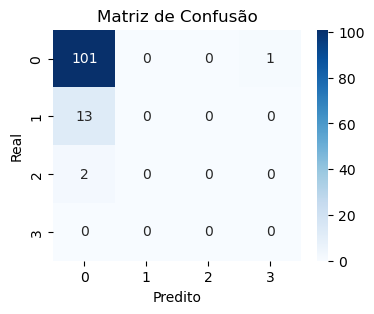

In [40]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar um gráfico de matriz de confusão
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [41]:
# KFold + cross-validation score
resultados_knn_clf = []
for i in range (5):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    score = cross_val_score(clf, X, y, cv = kfold)
    resultados_knn_clf.append(score.mean())

df_resultados_knn_clf = pd.DataFrame(resultados_knn_clf,columns=['resultados_knn'])
df_resultados_knn_clf.describe()

,resultados_knn
count,5.000000
mean,0.880589
std,0.001339
min,0.878932
25%,0.879969
50%,0.880495
75%,0.880995
max,0.882555


## 5.2.2 - SVM

In [42]:
# Grid Search
# Definir os valores dos hiperparâmetros a serem testados
param_grid = {
    'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001],
    'C' : [2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
    'random_state' : [1, 2, 3, 4, 5, 6],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
    }

# Criar um objeto GridSearchCV com os valores dos hiperparâmetros a serem testados
grid = GridSearchCV(SVC(), param_grid)

# Treinar o modelo com o conjunto de treinamento
grid.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid.best_params_)

Melhores hiperparâmetros: {'C': 2.5, 'kernel': 'rbf', 'random_state': 1, 'tol': 0.1}


In [43]:
# Treinar o modelo
clf = SVC(C=2.5, kernel='rbf', random_state=1, tol=0.1)
clf.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o desempenho do modelo
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred, average='weighted')*100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred, average='weighted')*100))
print("F1 Score: {:.2f}%".format(f1_score(y_test, y_pred, average='weighted')*100))

Acurácia: 86.32%
Precisão: 75.91%
Recall: 86.32%
F1 Score: 80.78%


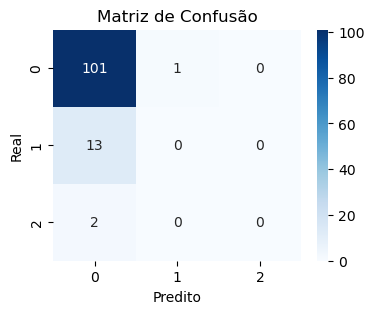

In [44]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar um gráfico de matriz de confusão
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [45]:
# KFold + cross-validation score
resultados_svm_clf = []
for i in range (5):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    score = cross_val_score(clf, X, y, cv = kfold)
    resultados_svm_clf.append(score.mean())

df_resultados_svm_clf = pd.DataFrame(resultados_svm_clf,columns=['resultados_svm'])
df_resultados_svm_clf.describe()

,resultados_svm
count,5.000000
mean,0.890813
std,0.000007
min,0.890806
25%,0.890808
50%,0.890811
75%,0.890818
max,0.890822


## 5.2.3 - SVM Linear

In [46]:
# Grid Search
# Definir os valores dos hiperparâmetros a serem testados
param_grid = {
    'loss': ['hinge', 'squared_hinge'],
    'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001],
    'C' : [2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
    'random_state' : [1, 2, 3, 4, 5, 6]
    }

# Criar um objeto GridSearchCV com os valores dos hiperparâmetros a serem testados
grid = GridSearchCV(LinearSVC(), param_grid)

# Treinar o modelo com o conjunto de treinamento
grid.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid.best_params_)

Melhores hiperparâmetros: {'C': 2.5, 'loss': 'squared_hinge', 'random_state': 1, 'tol': 0.1}


In [47]:
# Treinar o modelo
clf = LinearSVC(C=4.0, loss='hinge', random_state=3, tol=0.001)
clf.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o desempenho do modelo
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred, average='weighted')*100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred, average='weighted')*100))
print("F1 Score: {:.2f}%".format(f1_score(y_test, y_pred, average='weighted')*100))

Acurácia: 87.18%
Precisão: 76.00%
Recall: 87.18%
F1 Score: 81.21%


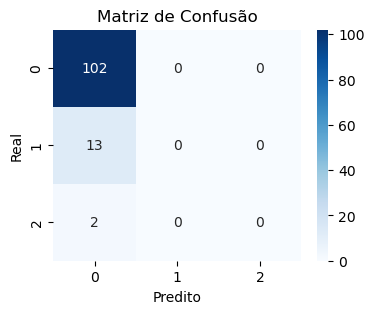

In [48]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar um gráfico de matriz de confusão
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [49]:
# KFold + cross-validation score
resultados_linear_svm_clf = []
for i in range (5):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    score = cross_val_score(clf, X, y, cv = kfold)
    resultados_linear_svm_clf.append(score.mean())

df_resultados_linear_svm_clf = pd.DataFrame(resultados_linear_svm_clf,columns=['resultados_linear_svm'])
df_resultados_linear_svm_clf.describe()

,resultados_linear_svm
count,5.000000
mean,0.890813
std,0.000007
min,0.890806
25%,0.890808
50%,0.890811
75%,0.890818
max,0.890822


## 5.2.4 - SGD Classifier

In [50]:
# Grid Search
# Definir os valores dos hiperparâmetros a serem testados
param_grid = {
    'loss' : ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty' : ['l2', 'l1', 'elasticnet', None],
    'alpha' : [0.0001, 0.001, 0.01, 0.1],
    'max_iter' : [5, 10, 20, 50, 100, 1000]
    }

# Criar um objeto GridSearchCV com os valores dos hiperparâmetros a serem testados
grid = GridSearchCV(SGDClassifier(), param_grid)

# Treinar o modelo com o conjunto de treinamento
grid.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid.best_params_)

Melhores hiperparâmetros: {'alpha': 0.01, 'loss': 'modified_huber', 'max_iter': 50, 'penalty': 'l2'}


In [51]:
# Treinar o modelo
clf = SGDClassifier(alpha=0.001, loss='modified_huber', max_iter=50, penalty='elasticnet')
clf.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o desempenho do modelo
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred, average='weighted')*100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred, average='weighted')*100))
print("F1 Score: {:.2f}%".format(f1_score(y_test, y_pred, average='weighted')*100))

Acurácia: 78.63%
Precisão: 78.94%
Recall: 78.63%
F1 Score: 78.77%


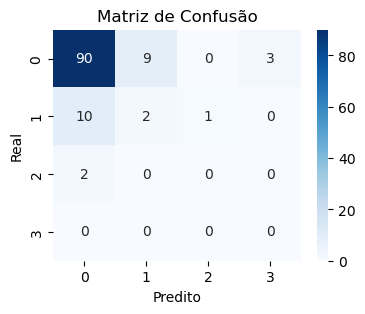

In [52]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar um gráfico de matriz de confusão
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [53]:
# KFold + cross-validation score
resultados_sgd_classifier_clf = []
for i in range (5):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    score = cross_val_score(clf, X, y, cv = kfold)
    resultados_sgd_classifier_clf.append(score.mean())

df_resultados_sgd_classifier = pd.DataFrame(resultados_sgd_classifier_clf,columns=['resultados_sgd_classifier'])
df_resultados_sgd_classifier.describe()

,resultados_sgd_classifier
count,5.000000
mean,0.888334
std,0.002245
min,0.885127
25%,0.886935
50%,0.889270
75%,0.889775
max,0.890563


## 5.2.5 - Regressão Logística

In [54]:
# Grid Search
# Definir os valores dos hiperparâmetros a serem testados
param_grid = {
    'random_state' : [0, 1, 2],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    }

# Criar um objeto GridSearchCV com os valores dos hiperparâmetros a serem testados
grid = GridSearchCV(LogisticRegression(), param_grid)

# Treinar o modelo com o conjunto de treinamento
grid.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid.best_params_)

Melhores hiperparâmetros: {'random_state': 0, 'solver': 'saga'}


In [55]:
# Treinar o modelo
clf = LogisticRegression(random_state=0, solver='saga')
clf.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o desempenho do modelo
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred, average='weighted')*100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred, average='weighted')*100))
print("F1 Score: {:.2f}%".format(f1_score(y_test, y_pred, average='weighted')*100))

Acurácia: 85.47%
Precisão: 79.16%
Recall: 85.47%
F1 Score: 81.59%


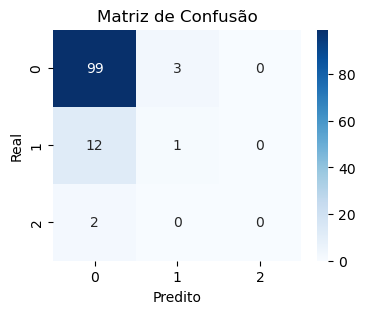

In [56]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar um gráfico de matriz de confusão
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [57]:
# KFold + cross-validation score
resultados_logistic_regression_clf = []
for i in range (5):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    score = cross_val_score(clf, X, y, cv = kfold)
    resultados_logistic_regression_clf.append(score.mean())

df_resultados_logistic_regression = pd.DataFrame(resultados_logistic_regression_clf,columns=['resultados_logistic_regression'])
df_resultados_logistic_regression.describe()

,resultados_logistic_regression
count,5.000000
mean,0.890348
std,0.000112
min,0.890291
25%,0.890294
50%,0.890301
75%,0.890305
max,0.890548


## 5.2.7 - Random Forest Classifier

In [58]:
# Grid Search
# Definir os valores dos hiperparâmetros a serem testados
param_grid = {
    'n_estimators' : [25, 50, 75, 100],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'min_samples_leaf' : [1, 3, 5, 7]
    }

# Criar um objeto GridSearchCV com os valores dos hiperparâmetros a serem testados
grid = GridSearchCV(RandomForestClassifier(), param_grid)

# Treinar o modelo com o conjunto de treinamento
grid.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid.best_params_)

Melhores hiperparâmetros: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}


In [59]:
# Treinar o modelo
clf = RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=6, n_estimators=25)
clf.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o desempenho do modelo
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred, average='weighted')*100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred, average='weighted')*100))
print("F1 Score: {:.2f}%".format(f1_score(y_test, y_pred, average='weighted')*100))

Acurácia: 87.18%
Precisão: 76.00%
Recall: 87.18%
F1 Score: 81.21%


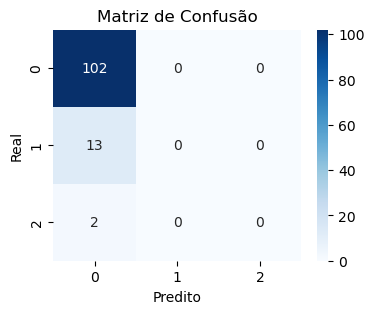

In [60]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar um gráfico de matriz de confusão
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [61]:
# KFold + cross-validation score
resultados_random_forest_classifier_clf = []
for i in range (5):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    score = cross_val_score(clf, X, y, cv = kfold)
    resultados_random_forest_classifier_clf.append(score.mean())

df_resultados_random_forest_classifier = pd.DataFrame(resultados_random_forest_classifier_clf,columns=['resultados_random_forest_classifier'])
df_resultados_random_forest_classifier.describe()

,resultados_random_forest_classifier
count,5.000000
mean,0.886890
std,0.001142
min,0.885917
25%,0.886163
50%,0.886423
75%,0.887205
max,0.888740


## 5.2.8 - Decision Tree Regressor

In [62]:
# Grid Search
# Definir os valores dos hiperparâmetros a serem testados
param_grid = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'min_samples_leaf' : [1, 3, 5, 7]
    }

# Criar um objeto GridSearchCV com os valores dos hiperparâmetros a serem testados
grid = GridSearchCV(DecisionTreeRegressor(), param_grid)

# Treinar o modelo com o conjunto de treinamento
grid.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid.best_params_)

Melhores hiperparâmetros: {'criterion': 'poisson', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [63]:
# Treinar o modelo
clf = DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=5, min_samples_split=6)
clf.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o desempenho do modelo
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred, average='weighted')*100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred, average='weighted')*100))
print("F1 Score: {:.2f}%".format(f1_score(y_test, y_pred, average='weighted')*100))

Acurácia: 86.32%
Precisão: 82.43%
Recall: 86.32%
F1 Score: 83.93%


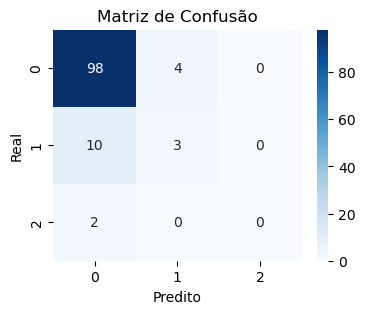

In [64]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar um gráfico de matriz de confusão
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [65]:
# KFold + cross-validation score
resultados_decision_tree_regressor_clf = []
for i in range (5):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    score = cross_val_score(clf, X, y, cv = kfold)
    resultados_decision_tree_regressor_clf.append(score.mean())

df_resultados_decision_tree_regressor = pd.DataFrame(resultados_decision_tree_regressor_clf,columns=['resultados_decision_tree_regressor'])
df_resultados_decision_tree_regressor.describe()

,resultados_decision_tree_regressor
count,5.000000
mean,-0.152554
std,0.025123
min,-0.180999
25%,-0.170141
50%,-0.158658
75%,-0.128714
max,-0.124258


## 5.3 - Resultado

In [66]:
# Criar uma lista com os DataFrames a serem concatenados
dataframes = [df_resultados_knn_clf, df_resultados_svm_clf, df_resultados_linear_svm_clf,
              df_resultados_sgd_classifier, df_resultados_logistic_regression,
              df_resultados_random_forest_classifier, df_resultados_decision_tree_regressor]

# Concatenar os DataFrames ao longo do eixo das colunas (axis=1)
resultados = pd.concat(dataframes, axis=1)

# Exibir o resultado
print(resultados.describe())

       resultados_knn  resultados_svm  resultados_linear_svm  \
count        5.000000        5.000000               5.000000   
mean         0.880589        0.890813               0.890813   
std          0.001339        0.000007               0.000007   
min          0.878932        0.890806               0.890806   
25%          0.879969        0.890808               0.890808   
50%          0.880495        0.890811               0.890811   
75%          0.880995        0.890818               0.890818   
max          0.882555        0.890822               0.890822   

       resultados_sgd_classifier  resultados_logistic_regression  \
count                   5.000000                        5.000000   
mean                    0.888334                        0.890348   
std                     0.002245                        0.000112   
min                     0.885127                        0.890291   
25%                     0.886935                        0.890294   
50%            

## 5.4 - Aplicando as obras o melhor algoritmo

In [67]:
# Selecionando y_obra e X_obra
y_obra = acidente_obra['num_acidente']
X_obra = acidente_obra[['mes', 'ano', 'br', 'uf', 'km_inicial', 'km_final', 'extensao']]

In [68]:
# OneHotEncoder
# Obter todas as categorias possíveis da coluna "uf"
uf_categories = df['uf'].unique()

# Codificar as colunas "uf" usando OneHotEncoder e fornecer as categorias possíveis
enc = OneHotEncoder(categories=[uf_categories], sparse=False, handle_unknown='ignore')
X_obra_enc = enc.fit_transform(X_obra[['uf']])

# Criar dataframes para as colunas codificadas
uf_encoded = pd.DataFrame(X_obra_enc, index=X_obra.index, columns=[f'uf_{category}' for category in uf_categories])

# Combinar as colunas codificadas com as outras variáveis independentes
X_obra = pd.concat([X_obra.drop(columns=['uf']), uf_encoded], axis=1)

# Remover a coluna "uf_(null)"
X_obra = X_obra.drop(columns=['uf_(null)'])

In [69]:
# StandardScaler
scaler = StandardScaler()
X_obra = scaler.fit_transform(X_obra) #troquei fit_transform por transform

In [70]:
# Fazer previsões com o conjunto de teste
y_obra_pred = clf.predict(X_obra)

# Avaliar o desempenho do modelo
print("Acurácia: {:.2f}%".format(accuracy_score(y_obra, y_obra_pred)*100))
print("Precisão: {:.2f}%".format(precision_score(y_obra, y_obra_pred, average='weighted')*100))
print("Recall: {:.2f}%".format(recall_score(y_obra, y_obra_pred, average='weighted')*100))
print("F1 Score: {:.2f}%".format(f1_score(y_obra, y_obra_pred, average='weighted')*100))

Acurácia: 77.14%
Precisão: 70.71%
Recall: 77.14%
F1 Score: 73.14%


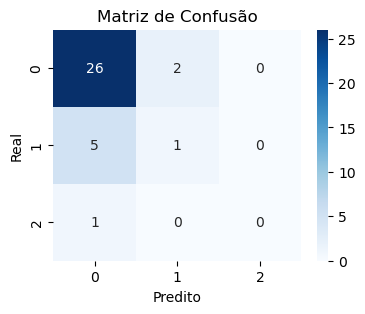

In [71]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_obra, y_obra_pred)

# Criar um gráfico de matriz de confusão
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [72]:
# Adicionar a coluna com as previsões na tabela
acidente_obra['num_acidente_pred'] = y_obra_pred

# Visualizar a tabela com as previsões
print(acidente_obra)

      obra    mes_ano  uf   br  km_inicial  km_final  extensao  num_acidente  \
32    G002 2018-03-01  MG  267        62.0     98.70     36.70           2.0   
36    G002 2018-07-01  MG  267        62.0     98.70     36.70           1.0   
131   G004 2017-04-01  MG   50        65.5     77.00     11.50           1.0   
162   G004 2019-11-01  MG   50        65.5     77.00     11.50           1.0   
163   G004 2019-12-01  MG   50        65.5     77.00     11.50           1.0   
164   G004 2020-01-01  MG   50        65.5     77.00     11.50           2.0   
191   G005 2017-05-01  MG  262         0.0     72.20     72.20           1.0   
197   G005 2017-11-01  MG  262         0.0     72.20     72.20           1.0   
200   G005 2018-02-01  MG  262         0.0     72.20     72.20           1.0   
226   G005 2020-04-01  MG  262         0.0     72.20     72.20           1.0   
227   G005 2020-05-01  MG  262         0.0     72.20     72.20           1.0   
230   G005 2020-08-01  MG  262         0